In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import datetime
s = tf.InteractiveSession()

/Users/mahyarjafarinodeh/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mahyarjafarinodeh/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mahyarjafarinodeh/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mahyar

In [4]:
from PIL import Image

In [5]:
data = pd.read_csv('./Q1_train.csv')

In [6]:
#Getting the labels
labels = data.iloc[:,0]
data.drop(columns = ['label'],inplace = True)
#standarizing
data = data/255

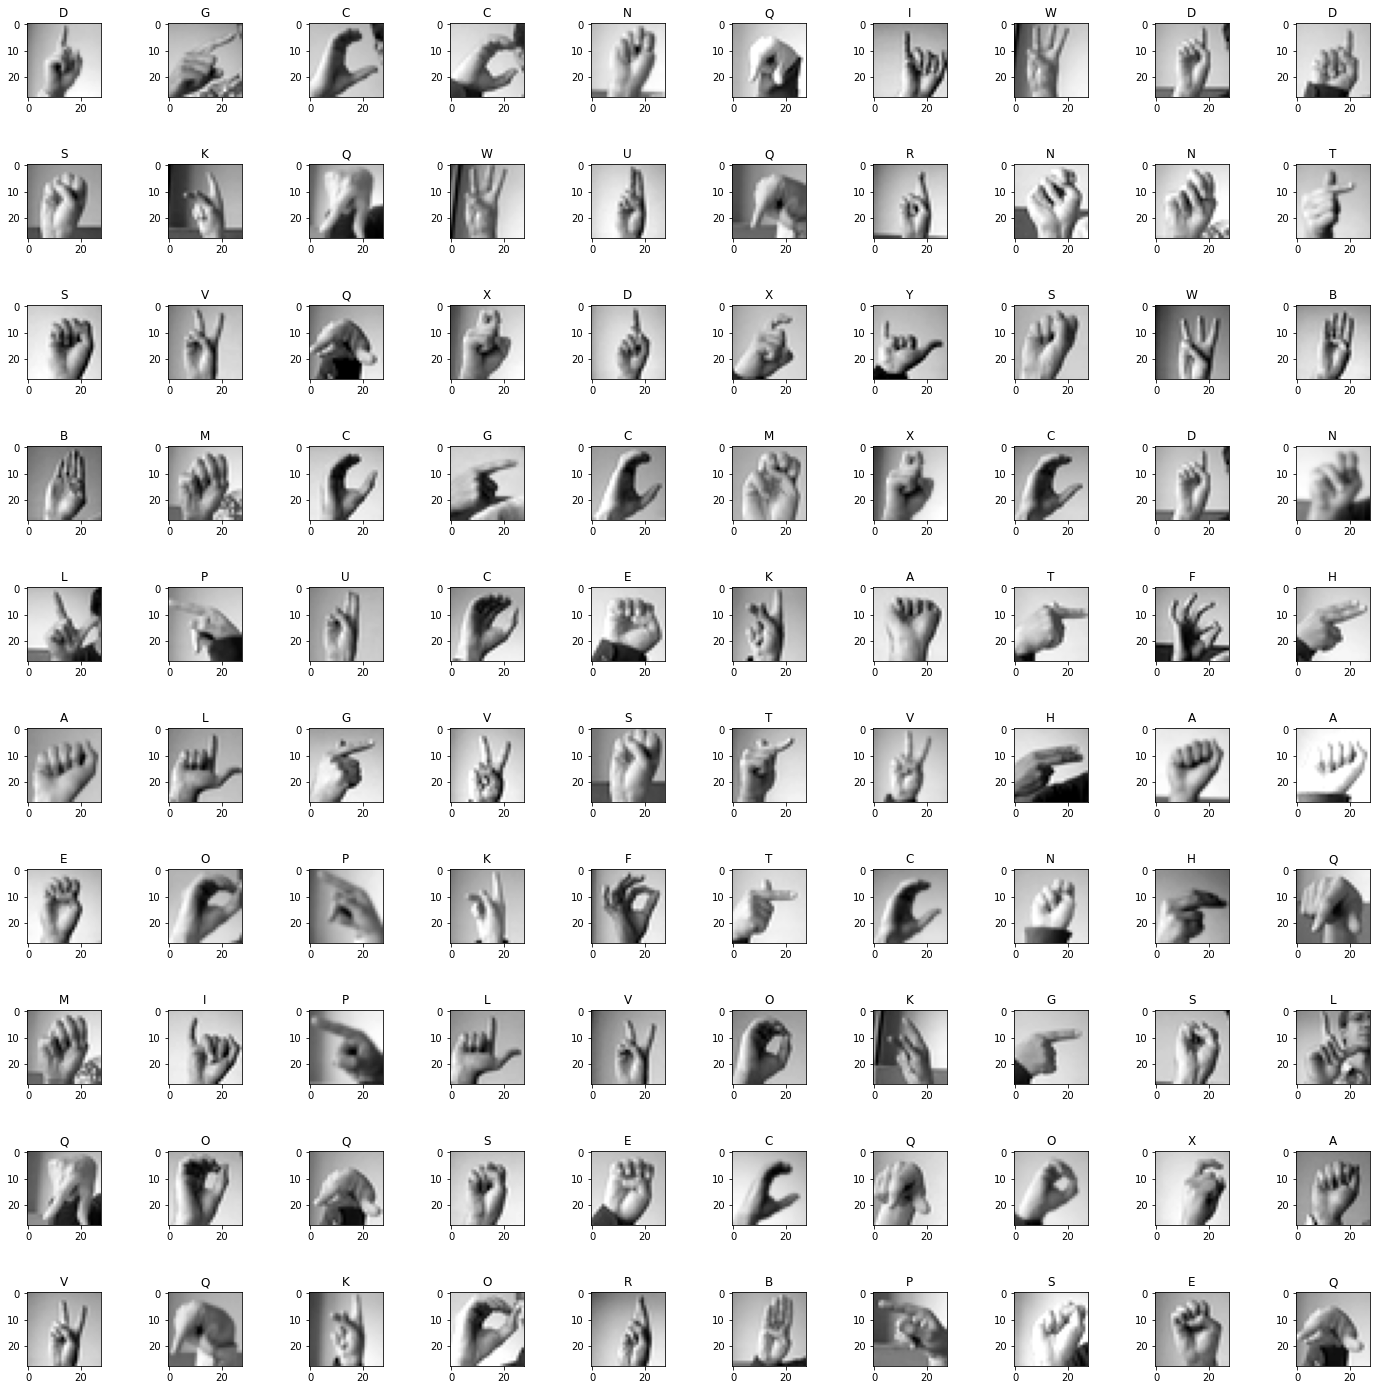

In [32]:
fig , ax = plt.subplots(nrows=10, ncols= 10, figsize = (20, 20))
ax = ax.flatten()
fig.tight_layout(pad=3.0)
for i, a in enumerate(ax):   
    a.imshow(data.values[i][:].reshape(28, 28), cmap = 'gray')
    a.set(title = string.ascii_letters[26+labels[i]])

In [7]:
#splitting the data
X_train, X_validation, y_train, y_validation = train_test_split(data, labels,test_size = 0.2, random_state = 123)
lb = LabelBinarizer()
lb.fit(np.arange(0, 25))
y_train = lb.transform(y_train)
y_validation = lb.transform(y_validation)

In [8]:
#features of model
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 1024
num_layers_1 = 1024
num_layers_2 = 1024
num_layers_3 = 1024
starter_learning_rate = 0.0005
starter_learning_rate2 = 0.025

In [9]:
#inputs and outputs
X_in = tf.placeholder('float32',shape =(None,num_features),name="X_in")
y_in = tf.placeholder('float32',shape = (None,num_classes),name='y_in')

In [10]:
# Weights initialized by random normal function with std_dev = sqrt(4/(number of input features+ number of output features)
with tf.name_scope('layer1'):
  weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(tf.sqrt(4/float(num_features + num_layers_0 )))))
  bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
  tf.summary.histogram('W1',weights_0)
  tf.summary.histogram('b1',bias_0)
with tf.name_scope('layer2'):
  weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(tf.sqrt(4/float(num_layers_0 + num_layers_1)))))
  bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
  tf.summary.histogram('W2',weights_1)
  tf.summary.histogram('b2',bias_1)
with tf.name_scope('layer3'):
  weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(tf.sqrt(4/float(num_layers_1 + num_layers_2 )))))
  bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
  tf.summary.histogram('W3',weights_2)
  tf.summary.histogram('b3',bias_2)
with tf.name_scope('layer4'):
  weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_layers_3], stddev=(tf.sqrt(4/float(num_layers_2 + num_layers_3)))))
  bias_3 = tf.Variable(tf.random_normal([num_layers_3]))
  tf.summary.histogram('W4',weights_3)
  tf.summary.histogram('b4',bias_3)
with tf.name_scope('layer5'):
  weights_4 = tf.Variable(tf.random_normal([num_layers_3,num_output], stddev=(tf.sqrt(1/float(num_layers_3 )))))
  bias_4 = tf.Variable(tf.random_normal([num_output]))
  tf.summary.histogram('W5',weights_4)
  tf.summary.histogram('b5',bias_4)

In [11]:
# Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(X_in,weights_0)   +bias_0)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)  +bias_1)
hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2) +bias_2)
hidden_output_3 = tf.nn.relu(tf.matmul(hidden_output_2,weights_3) +bias_3)
y_pred = tf.sigmoid(tf.matmul(hidden_output_3,weights_4) +bias_4)

In [12]:
with tf.name_scope('loss'):
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred,labels=y_in))
  tf.summary.scalar('loss', loss)

In [13]:
#learning rate of Dynamic type
with tf.name_scope('learning_rate'):
  learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 8, 0.965, staircase=True)
  learning_rate2 = tf.train.exponential_decay(starter_learning_rate, 0, 4, 0.95, staircase=True)
  tf.summary.scalar('learning_rate', learning_rate)

In [14]:
# Adam optimzer for finding the right weight

#Two optimizers are set on our network at the first place 

optimizer_adam = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,weights_3,weights_4,
                                                                         bias_0,bias_1,bias_2, bias_3,bias_4])
optimizer_sgd = tf.train.GradientDescentOptimizer(starter_learning_rate2).minimize(loss,var_list=[weights_0,weights_1,weights_2, weights_3,
                                                                         bias_0,bias_1,bias_2, bias_3])


In [15]:
#calculating accuaracy
with tf.name_scope('accuracy'):
  correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(y_pred,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  tf.summary.scalar('accuracy', accuracy)

In [16]:
#splitting train and test
X_train, X_validation= X_train.values, X_validation.values

In [17]:
# Training parameters with adam optimizer and without Dropout
batch_size = 170
epochs= 36
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer_adam, {X_in: X_train[arr[index:index+batch_size]][:],
                          y_in: y_train[arr[index:index+batch_size]][:]} )
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train}))
    
        
#Evaluate
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation}).argmax(1)))
    testing_loss.append(s.run(loss, {X_in: X_validation, 
                                      y_in: y_validation}))

    print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}")
    if epoch == 34:
        print(s.run(y_pred, feed_dict = {X_in : X_train[1,:].reshape(1, 784)}))

Epoch:0, Train loss: 2.63 Train acc: 0.292, Test acc:0.282
Epoch:1, Train loss: 2.49 Train acc: 0.531, Test acc:0.520
Epoch:2, Train loss: 2.44 Train acc: 0.643, Test acc:0.622
Epoch:3, Train loss: 2.38 Train acc: 0.751, Test acc:0.749
Epoch:4, Train loss: 2.37 Train acc: 0.786, Test acc:0.789
Epoch:5, Train loss: 2.36 Train acc: 0.811, Test acc:0.816
Epoch:6, Train loss: 2.35 Train acc: 0.833, Test acc:0.836
Epoch:7, Train loss: 2.34 Train acc: 0.881, Test acc:0.883
Epoch:8, Train loss: 2.42 Train acc: 0.714, Test acc:0.700
Epoch:9, Train loss: 2.52 Train acc: 0.669, Test acc:0.676
Epoch:10, Train loss: 2.33 Train acc: 0.922, Test acc:0.923
Epoch:11, Train loss: 2.35 Train acc: 0.878, Test acc:0.873
Epoch:12, Train loss: 2.31 Train acc: 0.949, Test acc:0.950
Epoch:13, Train loss: 2.30 Train acc: 0.967, Test acc:0.966
Epoch:14, Train loss: 2.30 Train acc: 0.974, Test acc:0.973
Epoch:15, Train loss: 2.32 Train acc: 0.933, Test acc:0.936
Epoch:16, Train loss: 2.30 Train acc: 0.974, Test 

In [18]:
import cv2
from PIL import Image

In [ ]:
cap  = cv2.VideoCapture(0)

f = 'salam'
nn = ''
while(True) : 
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.startWindowThread()
    cv2.rectangle(gray, (400, 100), (700, 400), (255, 0, 0), 10)
    #txt = f'{f} and {nn:.3f}'
    cv2.putText(gray, f +','+str(nn) , (300 , 650), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 0), 5, 5)
    cv2.imshow('webcam', gray)
    a = gray[100:400, 400:700]
    b = Image.fromarray(a)
    c = b.resize((28, 28), Image.ANTIALIAS)
    k = c
    d = np.array(c)
    g = d/255
    kk = s.run(y_pred, feed_dict = {X_in : g.reshape(1, 784)}).reshape(1, -1)
    f = string.ascii_letters[26 + kk.argmax()]
    nn = kk.max()
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
        
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

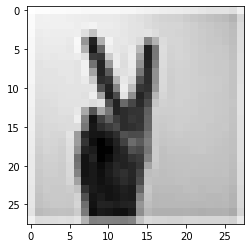

In [20]:
plt.imshow(np.array(k), cmap = 'gray')

In [117]:
labels.max()

24

In [23]:
a = s.run(y_pred, feed_dict = {X_in : data.values[7][:].reshape(1, 784)})
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [25]:
string.ascii_letters[48]

'W'

In [28]:
c = np.arange(20)
d = c.argsort()

In [29]:
d

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])